# Regression

In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.reset_defaults()
sns.set_style("whitegrid") #  {darkgrid, whitegrid, dark, white, ticks}
sns.set_context("talk")

Things to do:
* Can also plot beta values? p-values? 

#### Function for loading results

In [2]:
def load_results(results_fn, rep_name):
    results_dir = '../../results/'
    results_path = os.path.join(results_dir,results_fn)
    
    with open(results_path, 'rb') as f:
        data = pickle.load(f)
    
    # Get regression results
    analysis = data['analysis']
    t_statistics_x1 = [] # 2d grid
    p_values_x1 = []     # 2d grid
    t_statistics_x2 = [] # warping (binary congruency)
    p_values_x2 = []     # warping (binary congruency)
    for run in analysis:
        t_statistics_x1.append([s['regression'][rep_name]['categorical_regression']['t_statistic'][1] for s in run])
        p_values_x1.append([s['regression'][rep_name]['categorical_regression']['p_value'][1] for s in run])
        t_statistics_x2.append([s['regression'][rep_name]['categorical_regression']['t_statistic'][2] for s in run])
        p_values_x2.append([s['regression'][rep_name]['categorical_regression']['p_value'][2] for s in run])
    t_statistics_x1 = np.array(t_statistics_x1)
    p_values_x1 = np.array(p_values_x1)
    t_statistics_x2 = np.array(t_statistics_x2)
    p_values_x2 = np.array(p_values_x2)
    
    # Get congruent vs. incongruent accuracy results
    results = data['results']
    cong_accs = []
    incong_accs = []
    for run in results:
        cong_accs.append([s['cong_acc'] for s in run['train_accs']])
        incong_accs.append([s['incong_acc'] for s in run['train_accs']])
    cong_accs = np.mean(cong_accs, axis=0)
    incong_accs = np.mean(incong_accs, axis=0)
    acc_ratios = cong_accs/incong_accs
    return t_statistics_x1, t_statistics_x2, acc_ratios # ignore p_values for now

#### Function for plotting results

In [3]:
def plot_regression(t_statistics_x1, t_statistics_x2, acc_ratios, title, save_fn):
    n_checkpoints = len(acc_ratios)
    fig, ax = plt.subplots(2,1, sharex=True, figsize=(20,12))
    
    # T statistics
    sns.boxplot(ax=ax[0], data=t_statistics_x1)
    sns.stripplot(ax=ax[0], data=t_statistics_x1)
    ax[0].axhline(y=1.96, color='r', linewidth=2)
    ax[0].axhline(y=-1.96, color='r', linewidth=2)
    ax[0].set_title("{}: 2D grid distances".format(title))
    ax[0].set_ylabel("T statistic")
    
    sns.boxplot(ax=ax[1], data=t_statistics_x2)
    sns.stripplot(ax=ax[1], data=t_statistics_x2)
    ax[1].axhline(y=1.96, color='r', linewidth=2)
    ax[1].axhline(y=-1.96, color='r', linewidth=2)
    ax[1].set_xticklabels([i*analyze_every for i in range(n_checkpoints)])
    ax[1].set_xlabel("Steps")
    ax[1].set_ylabel("T statistic")
    ax[1].set_title("{}: Congruency".format(title))
    
    # Accuracy ratio
#     ax2 = ax.twinx()
#     ax2 = sns.lineplot(data=acc_ratios, err_style="bars", markers=True, dashes=False, palette=['darkblue'])
#     ax.set_title("Warping vs. accuracy")
#     ax2.legend(["Accuracy Ratio"])
#     ax2.set_ylim([-1, 3])
#     ax2.set_ylabel("Ratio (congruent / incongruent)")

    # Save
    if save_fn is not None:
        plt.savefig(save_fn, dpi=300, bbox_inches='tight')
    
    plt.show()

## MLP

In [4]:
results_fn = 'mlp.P'
rep_name = 'hidden'
analyze_every = 50
title = "MLP"
save_fn = '../../figures/mlp_regression.png'

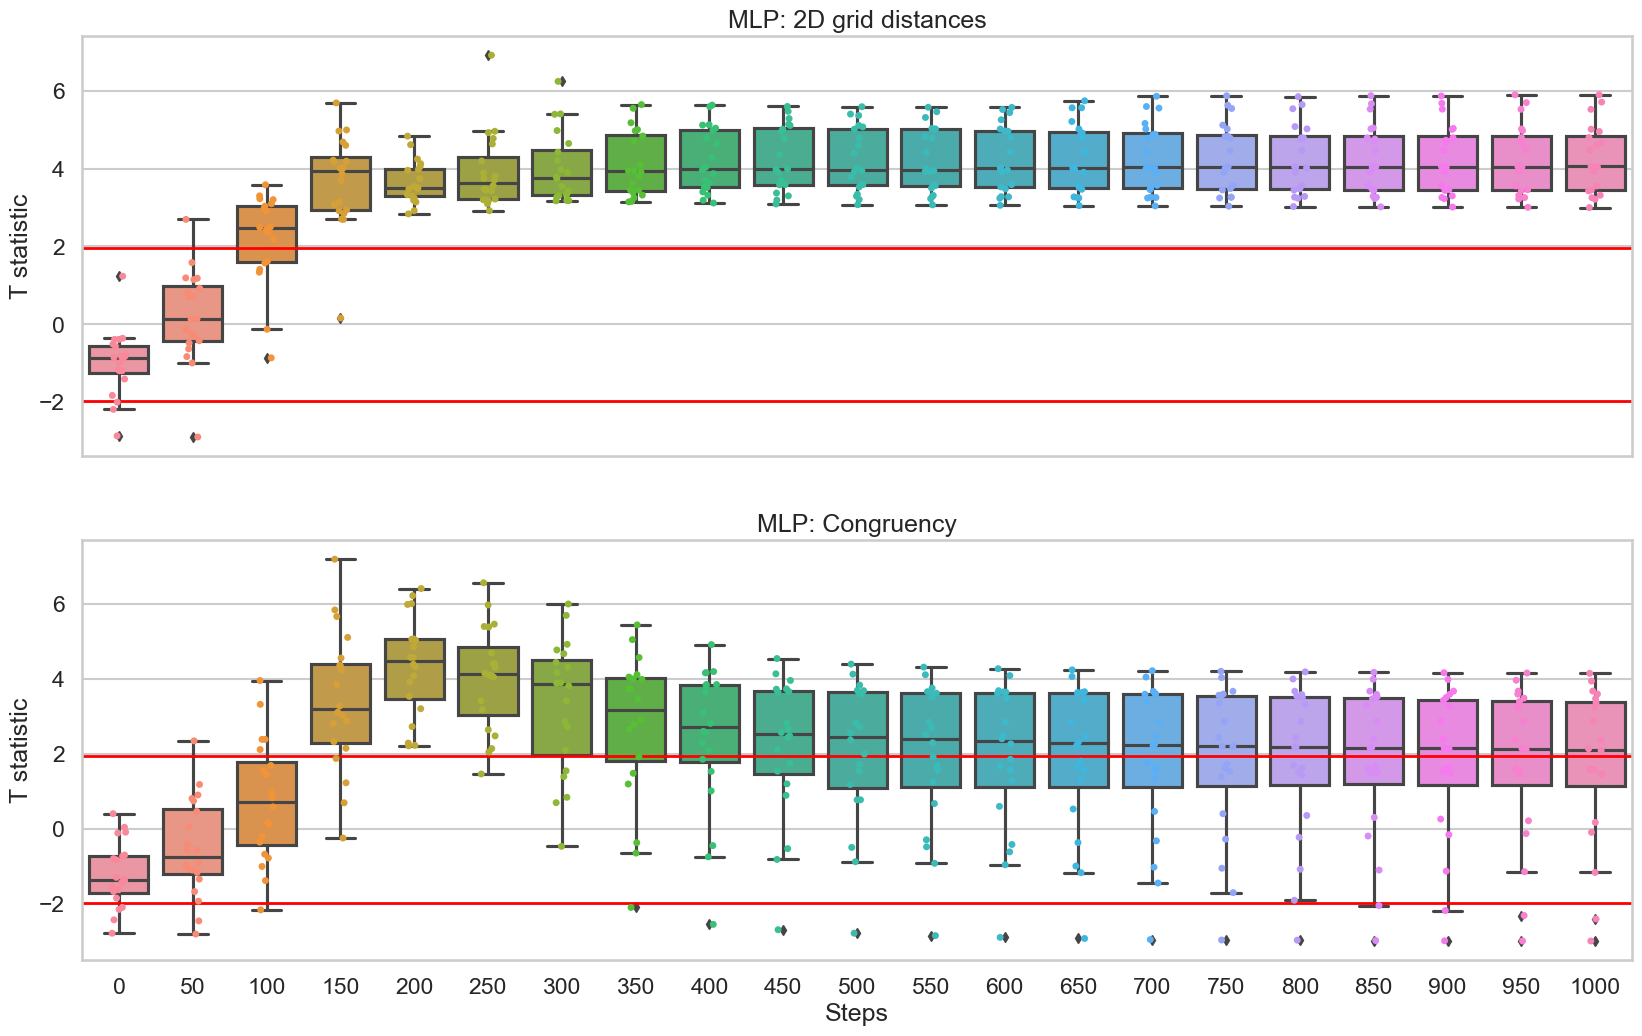

In [5]:
t_statistics_x1, t_statistics_x2, acc_ratios = load_results(results_fn, rep_name)
plot_regression(t_statistics_x1, t_statistics_x2, acc_ratios, title, save_fn)

## MLP balanced training

In [6]:
results_fn = 'mlp_balance.P'
rep_name = 'hidden'
analyze_every = 50
title = "MLP with balanced training"
save_fn = '../../figures/mlp_balance_regression.png'

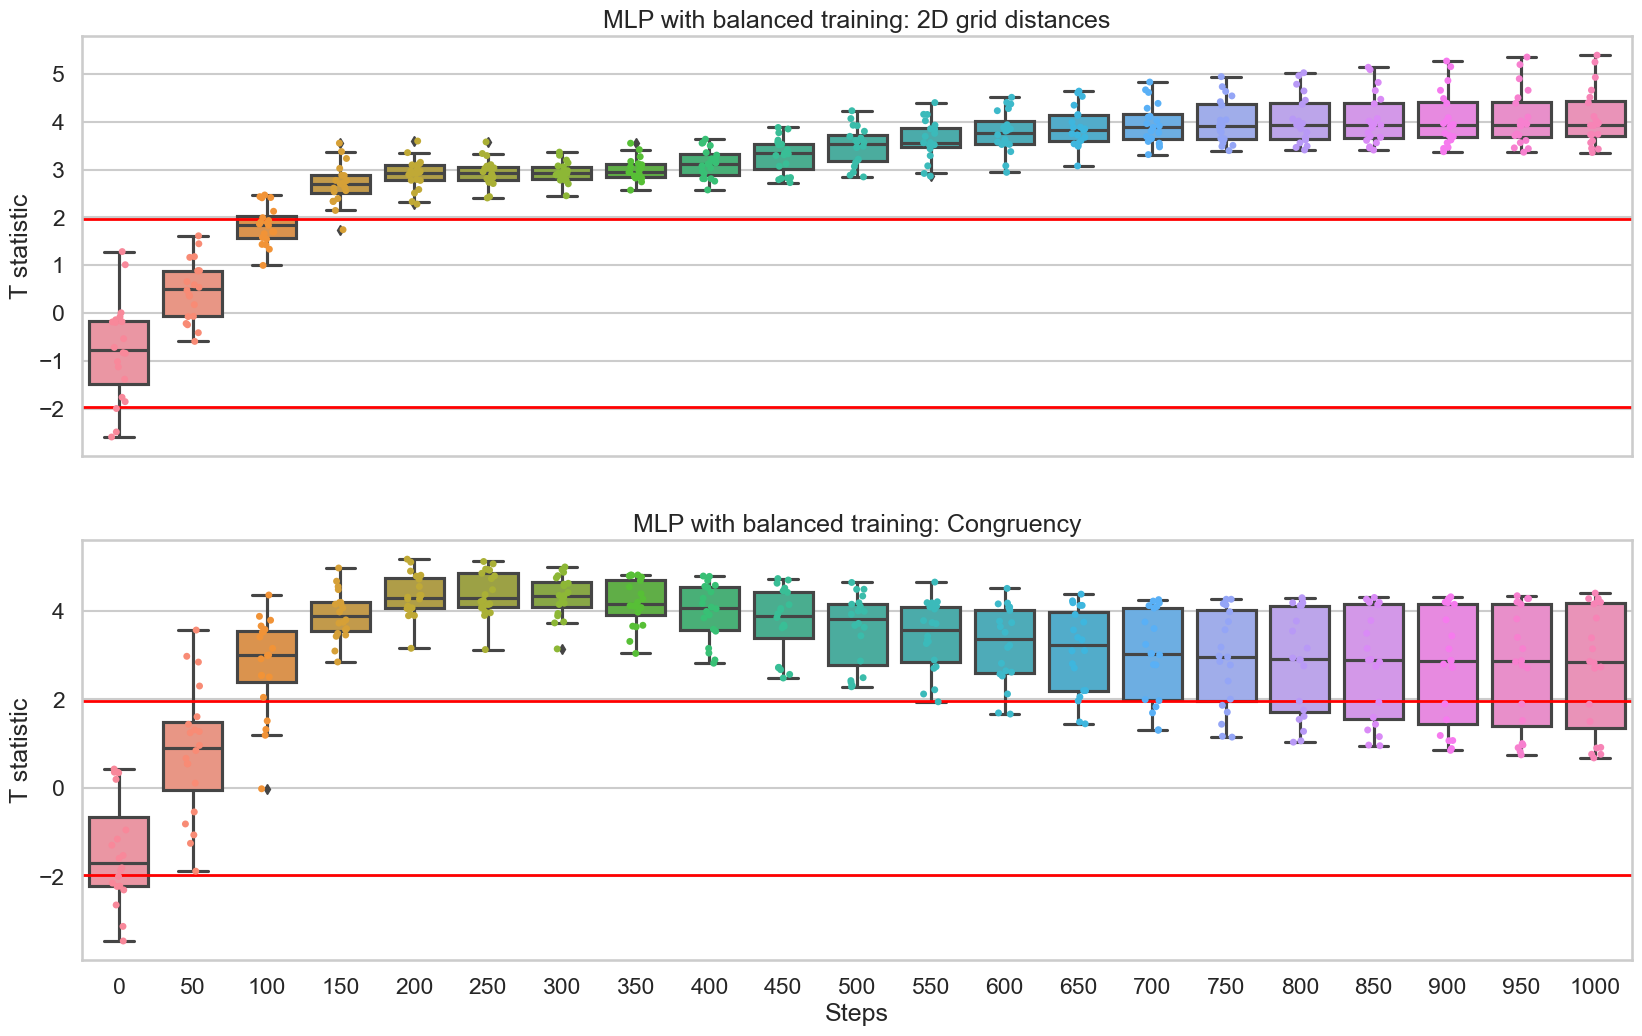

In [7]:
t_statistics_x1, t_statistics_x2, acc_ratios = load_results(results_fn, rep_name)
plot_regression(t_statistics_x1, t_statistics_x2, acc_ratios, title, save_fn)

## MLP in 6x6 grid

In [8]:
results_fn = 'mlp_6x6.P'
rep_name = 'hidden'
analyze_every = 50
title = "MLP in 6x6 grid"
save_fn = '../../figures/mlp_6x6_regression.png'

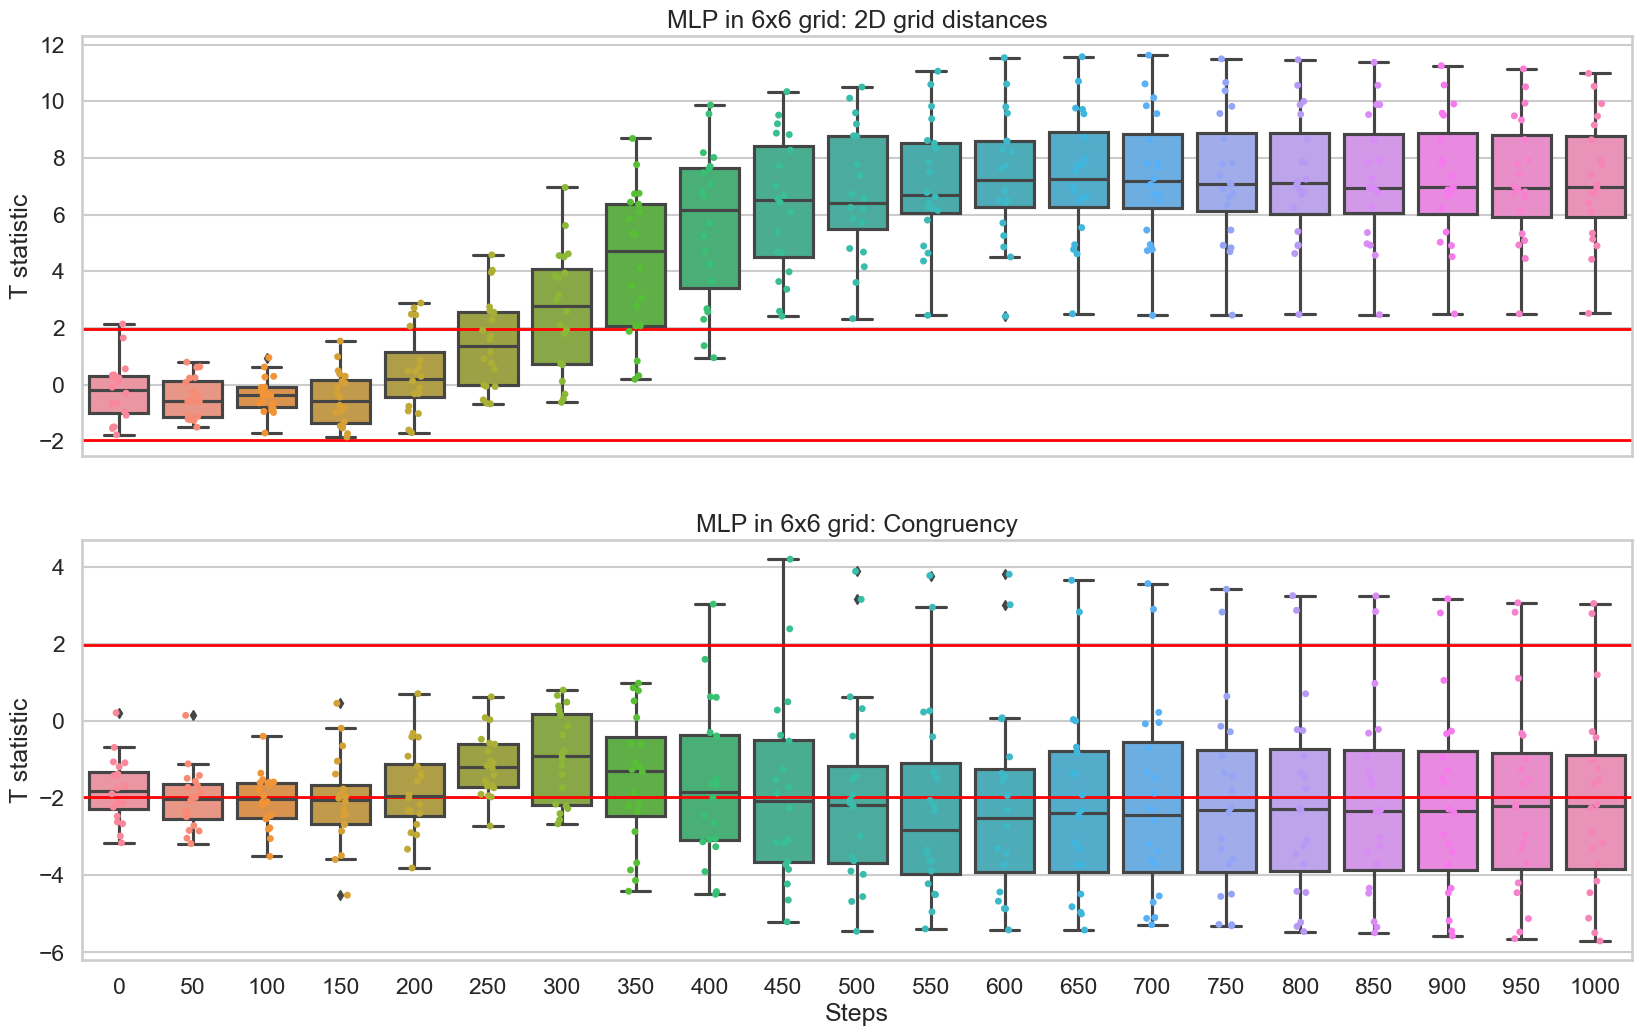

In [9]:
t_statistics_x1, t_statistics_x2, acc_ratios = load_results(results_fn, rep_name)
plot_regression(t_statistics_x1, t_statistics_x2, acc_ratios, title, save_fn)

## RNN

In [10]:
results_fn = 'rnn.P'
rep_name = 'average'
analyze_every = 50
title = "RNN"
save_fn = '../../figures/rnn_regression.png'

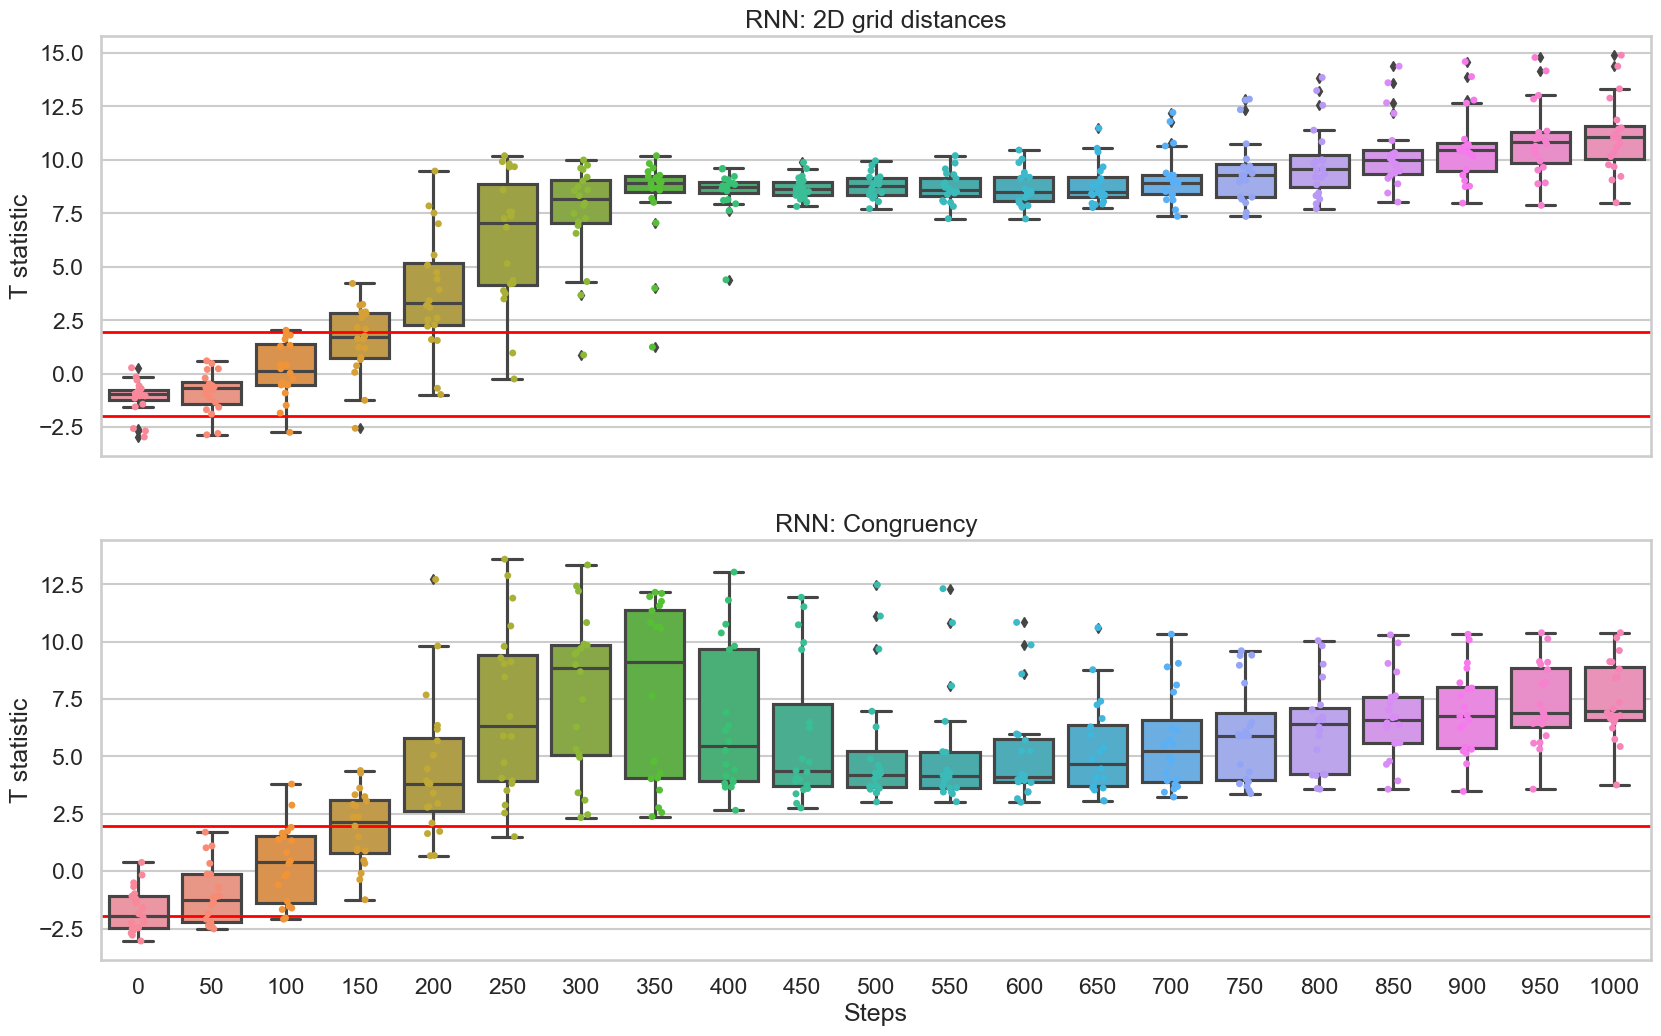

In [11]:
t_statistics_x1, t_statistics_x2, acc_ratios = load_results(results_fn, rep_name)
plot_regression(t_statistics_x1, t_statistics_x2, acc_ratios, title, save_fn)

## RNN with balanced training

In [12]:
results_fn = 'rnn_balance.P'
rep_name = 'average'
analyze_every = 50
title = "RNN with balanced training"
save_fn = '../../figures/rnn_balance_regression.png'

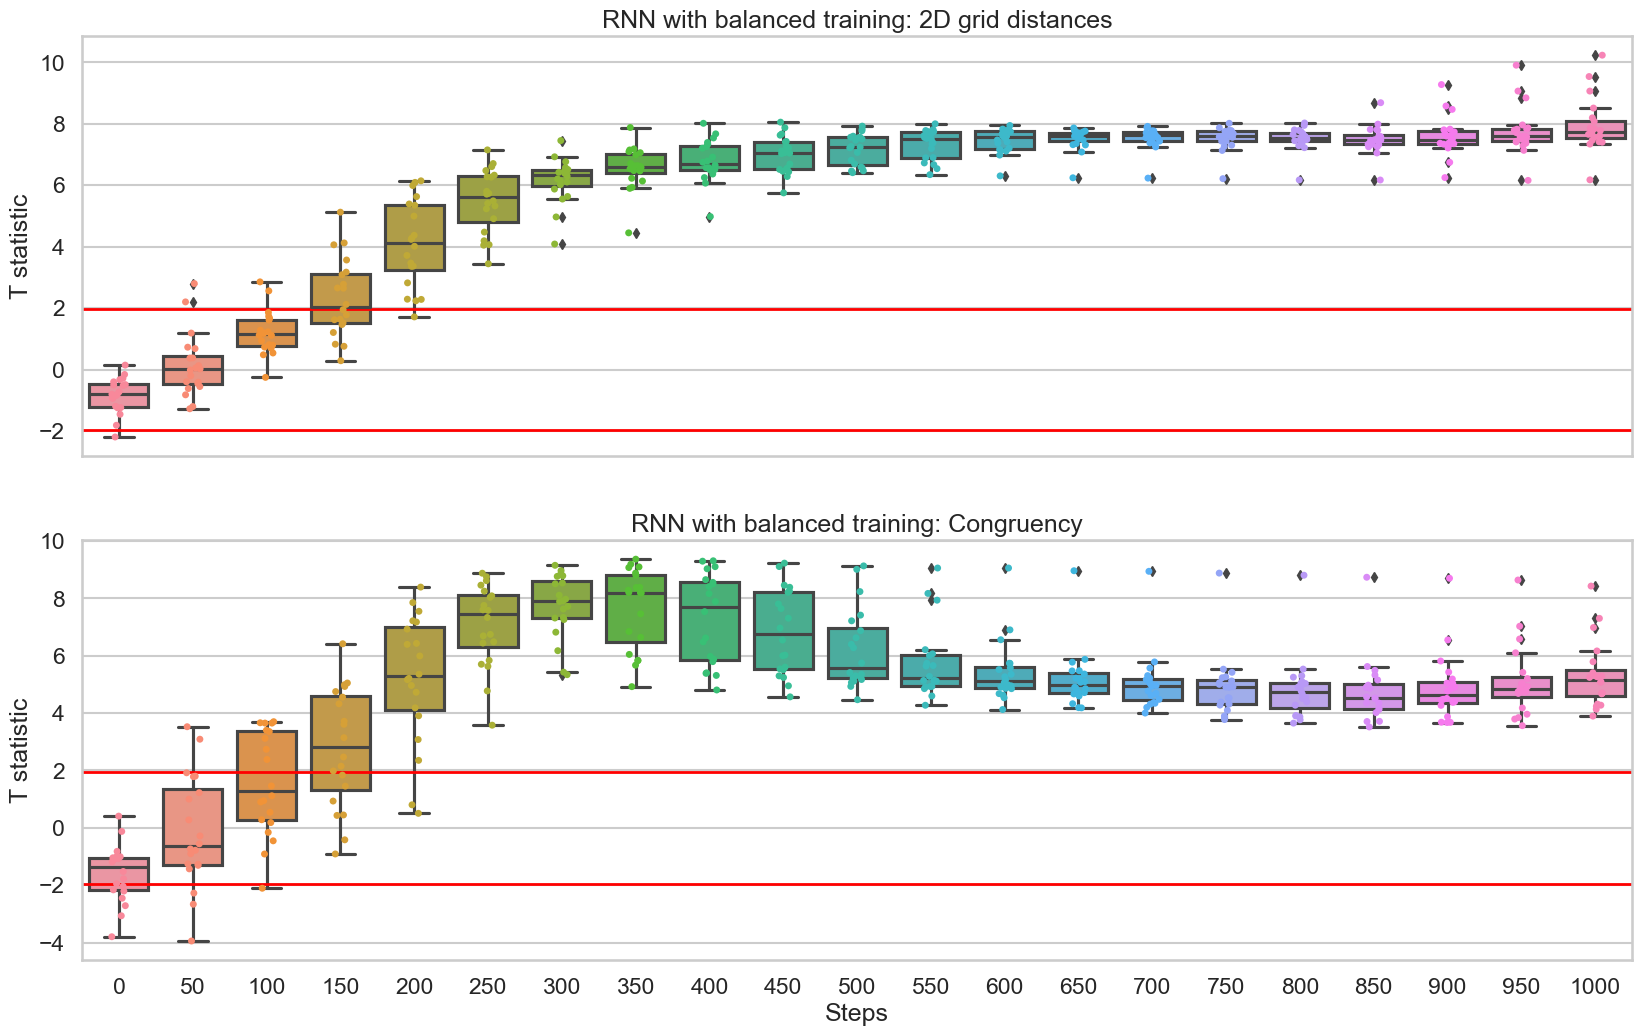

In [13]:
t_statistics_x1, t_statistics_x2, acc_ratios = load_results(results_fn, rep_name)
plot_regression(t_statistics_x1, t_statistics_x2, acc_ratios, title, save_fn)

## RNN in 6x6 grid

In [14]:
results_fn = 'rnn_6x6.P'
rep_name = 'average'
analyze_every = 50
title = "RNN in 6x6 grid"
save_fn = '../../figures/rnn_6x6_regression.png'

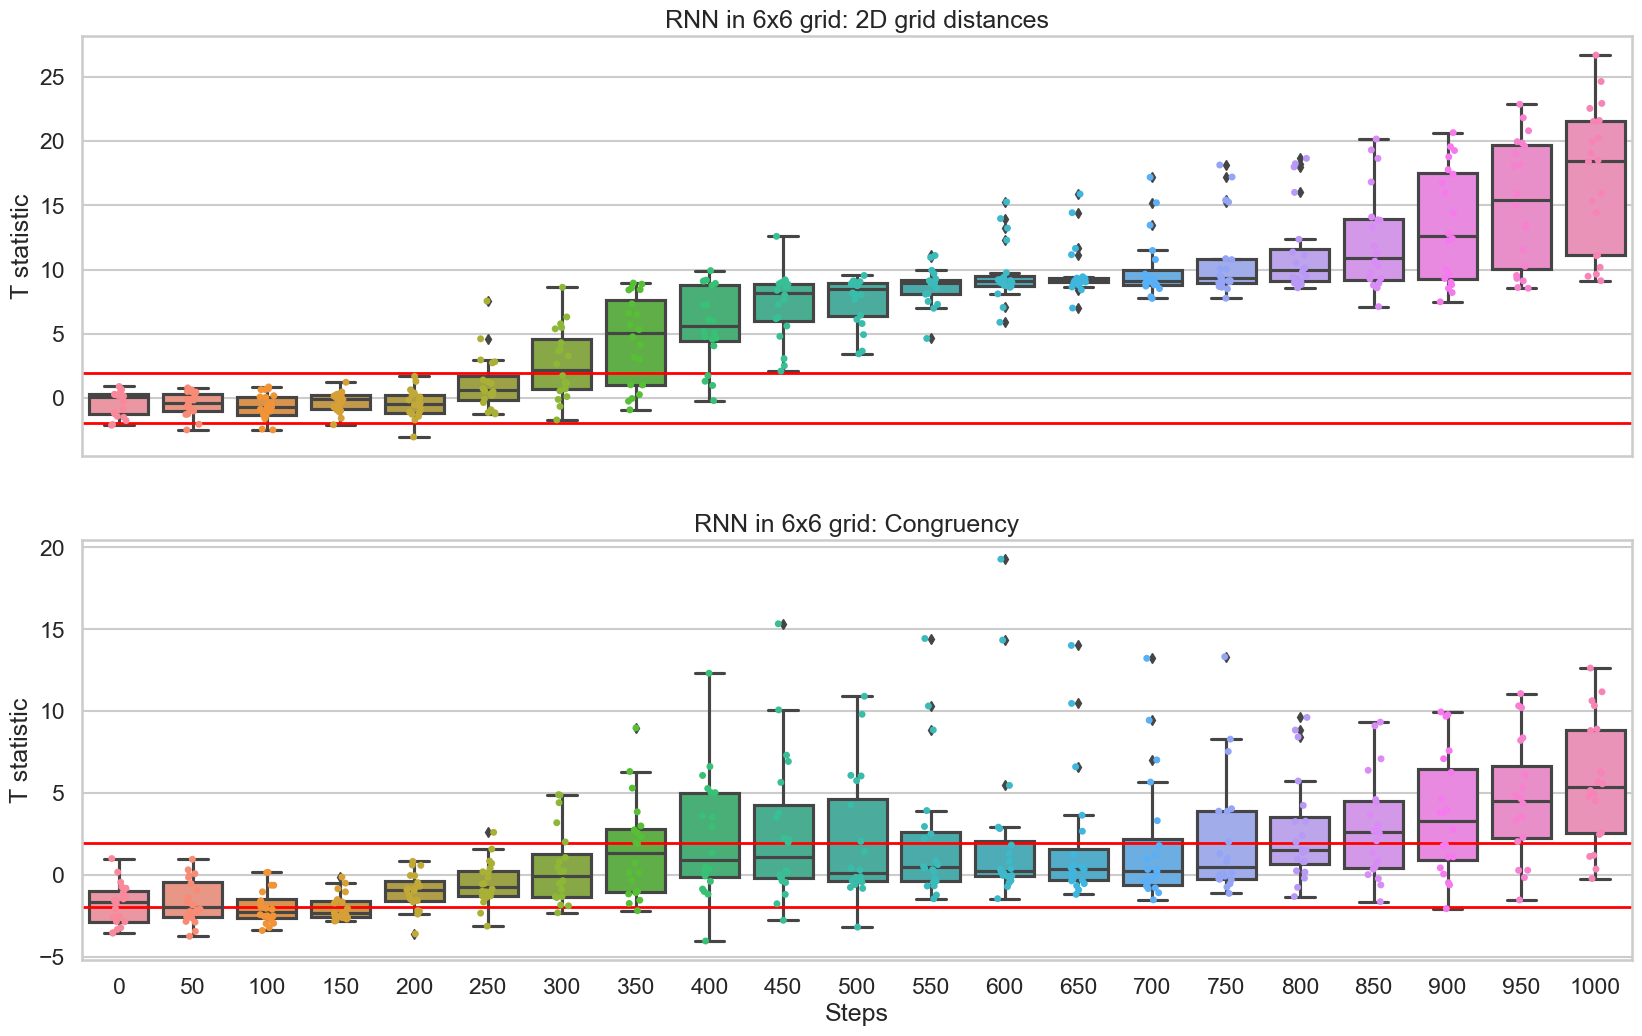

In [15]:
t_statistics_x1, t_statistics_x2, acc_ratios = load_results(results_fn, rep_name)
plot_regression(t_statistics_x1, t_statistics_x2, acc_ratios, title, save_fn)